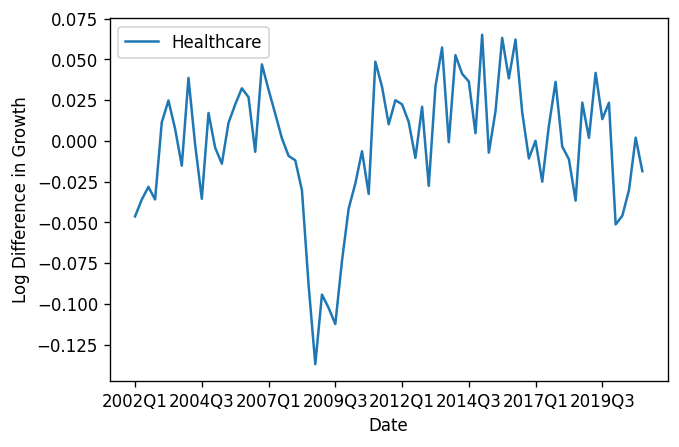

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Healthcare_Forward   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     13.27
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           4.01e-08
Time:                        19:22:25   Log-Likelihood:                 156.85
No. Observations:                  76   AIC:                            -303.7
Df Residuals:                      71   BIC:                            -292.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0030      0.008     -0.390      0.698      -0.019       0.012
Time              7.734e-05      0.000      0.414      0.680      -0.000       0.000
Healthcare           0.6356      0.094      6.736      0.000       0.447       0.824
after_COVID         -0.0197      1.066     -0.018      0.985      -2.146       2.107
Time_after_COVID     0.0002      0.014      0.013      0.990      -0.028       0.029
==============================================================================
Omnibus:                        0.071   Durbin-Watson:                   2.269
Prob(Omnibus):                  0.965   Jarque-Bera (JB):                0.028
Skew:                          -0.035   Prob(JB):                        0.986
Kurtosis:                       2.936   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1]:
#Import additional data from spreadsheet
#i.e. commercial and healthcare for different comparison
import pandas as pd
import numpy as np
df = pd.read_csv("healthcare_data.csv")
df.head(5)

df['Healthcare'] = np.log(df['Healthcare'])
df['Healthcare Lagged'] = df['Healthcare'].shift(-1)
df['Healthcare'] = df['Healthcare Lagged'] - df['Healthcare']

#Get summary Statistics
df['Healthcare'].mean()

df['Healthcare'].median()

df['Healthcare'].std()

#Plot the data for better visualization
import matplotlib.pyplot as plt
import numpy as np

df2 = pd.DataFrame()
df2['Healthcare'] = df['Healthcare']
df2['Date'] = df['Date']
plt.figure(figsize=(6, 4), dpi=120)
plt.xlabel("Date")
plt.ylabel("Log Difference in Growth")
#plt.title('Healthcare Growth From 2002 to Today (Logarithmic Difference)')
ax = plt.gca()
df.plot(x='Date', y='Healthcare', ax=ax)
plt.show()

#Create dummy variables
dummy_variables = pd.get_dummies(df['Dummy Variable'])

#Merge with existing dataframe
#Need to separate this code for better reusability
df = pd.concat([df, dummy_variables], axis=1)
df = df.rename(columns={0: "before_COVID", 1: "after_COVID"})
df.head()

#Adding additional variables needed for regression
df['Time'] = df.index
df['Time'] += 1
df['Healthcare Lagged'] = df['Healthcare'].shift(-1)
df = df.rename(columns={"Healthcare Lagged": "Healthcare_Forward"})
df = df.iloc[:-1 , :]
df['Time_after_COVID'] = df['Time'] * df['after_COVID']
df.head()

#OLS Regression with the following formula
#Software_Investment_Forward = Time + Software_Investment + after_COVID + Time * after_COVID
#where after_COVID is our dummy variable with values of only 0 or 1
import statsmodels.formula.api as smf
lin_reg = smf.ols(formula='Healthcare_Forward~Time + Healthcare + after_COVID + Time_after_COVID', data=df).fit()
lin_reg.summary()

In [2]:
#Get summary Statistics
print("Mean: " + str(df['Healthcare'].mean()) +
"\nMedian: " + str(df['Healthcare'].median()),
"\nStd. Dev: " + str(df['Healthcare'].std()))

Mean: -0.002247790250218637
Median: 0.0018253731870983003 
Std. Dev: 0.04093073181413023


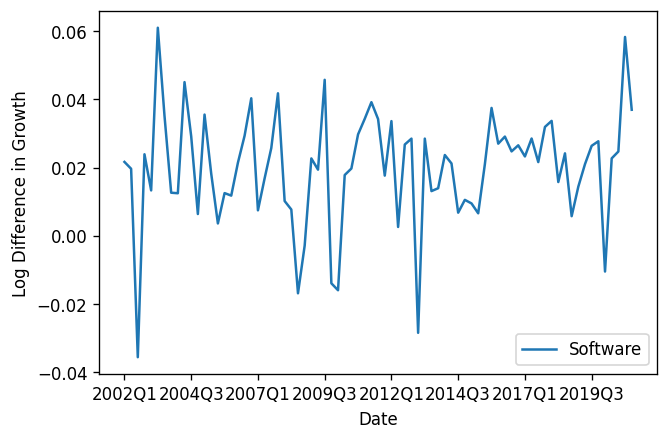

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Software_Forward   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.277
Date:                Sun, 03 Oct 2021   Prob (F-statistic):              0.287
Time:                        19:22:25   Log-Likelihood:                 204.88
No. Observations:                  76   AIC:                            -399.8
Df Residuals:                      71   BIC:                            -388.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0170      0.005      3.732      0.000       0.008       0.026
Time              1.545e-05    9.6e-05      0.161      0.873      -0.000       0.000
Software             0.0693      0.122      0.567      0.572      -0.174       0.313
after_COVID         -0.4445      0.594     -0.748      0.457      -1.629       0.740
Time_after_COVID     0.0062      0.008      0.775      0.441      -0.010       0.022
==============================================================================
Omnibus:                       12.960   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.062
Skew:                          -0.773   Prob(JB):                     0.000325
Kurtosis:                       4.638   Cond. No.                     1.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
#Import additional data from spreadsheet
#i.e. commercial and healthcare for different comparison
df = pd.read_csv("software_data.csv")
df.head(5)

df['Software'] = np.log(df['Software'])
df['Software Lagged'] = df['Software'].shift(-1)
df['Software'] = df['Software Lagged'] - df['Software']

#Plot the data for better visualization
df2['Software'] = df['Software']
plt.figure(figsize=(6, 4), dpi=120)
plt.xlabel("Date")
plt.ylabel("Log Difference in Growth")
#plt.title('Healthcare Growth From 2002 to Today (Logarithmic Difference)')
ax = plt.gca()
df.plot(x='Date', y='Software', ax=ax)
plt.show()

#Create dummy variables
dummy_variables = pd.get_dummies(df['Dummy Variable'])

#Merge with existing dataframe
#Need to separate this code for better reusability
df = pd.concat([df, dummy_variables], axis=1)
df = df.rename(columns={0: "before_COVID", 1: "after_COVID"})
df.head()

#Adding additional variables needed for regression
df['Time'] = df.index
df['Time'] += 1
df['Software Lagged'] = df['Software'].shift(-1)
df = df.rename(columns={"Software Lagged": "Software_Forward"})
df = df.iloc[:-1 , :]
df['Time_after_COVID'] = df['Time'] * df['after_COVID']
df.head()

#OLS Regression with the following formula
#Software_Investment_Forward = Time + Software_Investment + after_COVID + Time * after_COVID
#where after_COVID is our dummy variable with values of only 0 or 1
import statsmodels.formula.api as smf
lin_reg = smf.ols(formula='Software_Forward~Time + Software + after_COVID + Time_after_COVID', data=df).fit()
lin_reg.summary()

In [4]:
#Get summary Statistics
print("Mean: " + str(df['Software'].mean()) +
"\nMedian: " + str(df['Software'].median()),
"\nStd. Dev: " + str(df['Software'].std()))

Mean: 0.019830814285797173
Median: 0.02161306337754798 
Std. Dev: 0.01690974929939137


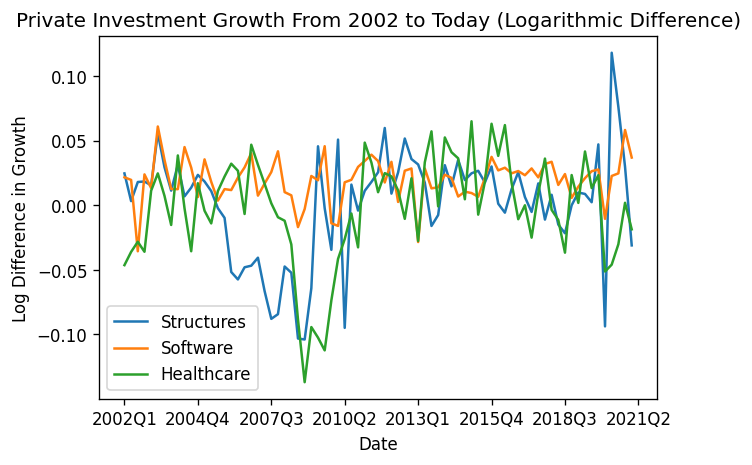

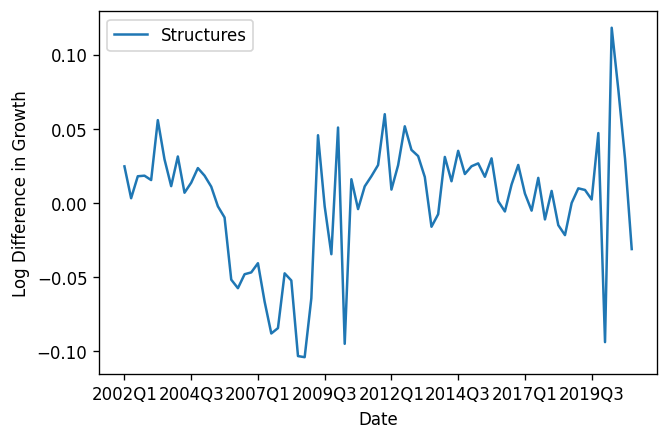

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Structures_Forward   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     10.00
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           1.77e-06
Time:                        19:22:25   Log-Likelihood:                 149.59
No. Observations:                  76   AIC:                            -289.2
Df Residuals:                      71   BIC:                            -277.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0057      0.008     -0.674      0.503      -0.022       0.011
Time              9.648e-05      0.000      0.480      0.632      -0.000       0.000
Structures           0.4530      0.100      4.536      0.000       0.254       0.652
after_COVID          4.8306      1.190      4.060      0.000       2.458       7.203
Time_after_COVID    -0.0644      0.016     -4.032      0.000      -0.096      -0.033
==============================================================================
Omnibus:                       17.638   Durbin-Watson:                   2.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.890
Skew:                          -0.895   Prob(JB):                     8.79e-07
Kurtosis:                       5.368   Cond. No.                     1.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
#Import additional data from spreadsheet
#i.e. commercial and healthcare for different comparison
df = pd.read_csv("structures_data.csv")
df.head(5)

df['Structures'] = np.log(df['Structures'])
df['Structures Lagged'] = df['Structures'].shift(-1)
df['Structures'] = df['Structures Lagged'] - df['Structures']

#Plot the data for better visualization
df2['Structures'] = df['Structures']

fig = plt.figure(figsize=(6, 4), dpi=120)
ax = fig.subplots()
plt.xlabel("Date")
plt.ylabel("Log Difference in Growth")
plt.title('Private Investment Growth From 2002 to Today (Logarithmic Difference)')
ax = plt.gca()
plt.plot(df2['Date'], df2['Structures'], label="Structures")
plt.plot(df2['Date'], df2['Software'], label="Software")
plt.plot(df2['Date'], df2['Healthcare'], label="Healthcare")
xticks = ax.xaxis.get_major_ticks()
i = 0
for tick in xticks:
    if(i%11 != 0 and i < len(xticks)):
        xticks[i].label1.set_visible(False)
        xticks[i].set_visible(False)
    i+=1
plt.legend()
plt.show()

plt.figure(figsize=(6, 4), dpi=120)
plt.xlabel("Date")
plt.ylabel("Log Difference in Growth")
#plt.title('Healthcare Growth From 2002 to Today (Logarithmic Difference)')
ax = plt.gca()
df.plot(x='Date', y='Structures', ax=ax)
plt.show()
#Create dummy variables
dummy_variables = pd.get_dummies(df['Dummy Variable'])

#Merge with existing dataframe
#Need to separate this code for better reusability
df = pd.concat([df, dummy_variables], axis=1)
df = df.rename(columns={0: "before_COVID", 1: "after_COVID"})
df.head()

#Adding additional variables needed for regression
df['Time'] = df.index
df['Time'] += 1
df['Structures Lagged'] = df['Structures'].shift(-1)
df = df.rename(columns={"Structures Lagged": "Structures_Forward"})
df = df.iloc[:-1 , :]
df['Time_after_COVID'] = df['Time'] * df['after_COVID']
df.head()

#OLS Regression with the following formula
#Software_Investment_Forward = Time + Software_Investment + after_COVID + Time * after_COVID
#where after_COVID is our dummy variable with values of only 0 or 1
import statsmodels.formula.api as smf
lin_reg = smf.ols(formula='Structures_Forward~Time + Structures + after_COVID + Time_after_COVID', data=df).fit()
lin_reg.summary()

In [6]:
#Get summary Statistics
print("Mean: " + str(df['Structures'].mean()) +
"\nMedian: " + str(df['Structures'].median()),
"\nStd. Dev: " + str(df['Structures'].std()))
df2.head()

Mean: 0.000420575883739997
Median: 0.011013452225384412 
Std. Dev: 0.042362066941491645


,Healthcare,Date,Software,Structures
0,-0.046390,2002Q1,0.021661,0.024678
1,-0.036113,2002Q2,0.019647,0.003206
2,-0.028273,2002Q3,-0.035647,0.018024
3,-0.036029,2002Q4,0.023906,0.018406
4,0.011321,2003Q1,0.013297,0.015452
